# FAKES NEW DETECTION
## Classification avec les algorithmes classiques de Machine Learning

L'objectif de ce notebook est classifier les articles avec les algorithmes classiques de machine learning

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
fakenews = pd.read_csv("output/fake_news_cleaned.csv", usecols=['title','text'])
realnews = pd.read_csv("output/real_news_cleaned.csv", usecols=['title','text'])

In [3]:
fakenews['type'] = 'fake'
realnews['type'] = 'true'

#fusionnée les 2 dataset
df_news = pd.concat([fakenews, realnews])

In [4]:
df_news.sample(n=10)

,title,text,type
7394,météo alerte aux orages ce dimanche après midi...,c dimanche le ciel sera très nuageux des avers...,true
5072,la princesse saoudienne aurait quitté paris sa...,la police judiciaire finalement pu accéder à a...,true
4015,dans une ambition intime arnaud montebourg a p...,médias dans une ambition intime arnaud montebo...,true
5834,israël des dirigeants du monde entier aux obsè...,des dizaines de dirigeants du monde entier réu...,true
7552,pro league genk met fin à une série de trois d...,n icolas verdier donné avance aux malinois 10e...,true
2388,ligue 1 marseille rejoint in extremis à angers,championnats étrangers découvrez les résultats...,true
3110,le rappeur anti flic en garde à vue,09 09 le rappeur jo le phéno auteur un clip v...,true
6857,pourquoi hypnose des vertus que on ignore,accueil culture lifestyle pourquoi hypnose des...,true
3150,les forces du régime progressent à alep,2 10 16 11h26 source belga afp le régime syrie...,true
11547,saint malo bientôt les vacances occasion de fa...,5 saint malo bientôt les vacances occasion de ...,true


### Reporting sur la dataset

In [4]:
ProfileReport(df_news)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,4
Number of observations,19169
Total Missing (%),0.0%
Total size in memory,599.2 KiB
Average record size in memory,32.0 B
Numeric,1
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


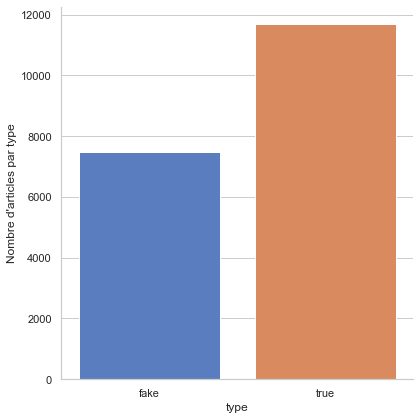

In [5]:
sns.set(style="whitegrid")
df_grp = data=df_news.groupby("type").count().reset_index()
g = sns.catplot(x="type", y="title", data=df_grp, height=6, kind="bar", palette="muted")
g.set_ylabels("Nombre d'articles par type")
g.set_titles("Nombre d'articles par type")

### Appliquer le downsampling sur le dataset realnews pour equilibrer les échantillons

In [6]:
from sklearn.utils import resample

In [7]:
realnews_resampled = resample(realnews, replace=False, n_samples=len(fakenews), random_state=0)

In [8]:
df_news = pd.concat([fakenews, realnews_resampled])

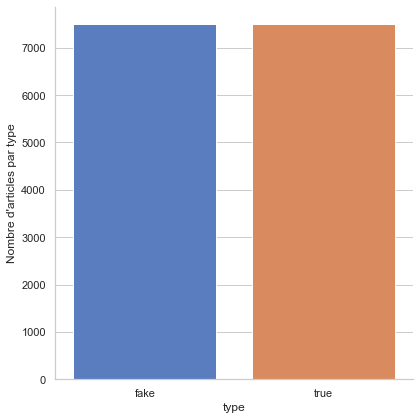

In [9]:
sns.set(style="whitegrid")
df_grp = data=df_news.groupby("type").count().reset_index()
g = sns.catplot(x="type", y="title", data=df_grp, height=6, kind="bar", palette="muted")
g.set_ylabels("Nombre d'articles par type")
g.set_titles("Nombre d'articles par type")

In [10]:
x, y = df_news['text'], df_news['type']

In [11]:
len(x), len(y)

(14984, 14984)

In [12]:
len(fakenews), len(realnews)

(7492, 11677)

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer

#telechargement de lexique
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
x[0]

'mettons les choses au clair mes chers compatriotes il quelques jours au travers de plusieurs déclarations ai relancé ma volonté forte de emparer du sujet sur immigration mais visiblement cette annonce ne semble pas avoir porté ses fruits tout du moins je ai pas ressenti un courant fort dans opinion publique me disant merci président de vous occupez enfin des vrais problèmes au contraire certains entre vous ont préféré marcher pour le climat au lieu de se saisir de vrais problèmes dont je vous ai parlés comme immigration aussi je pose la question simplement en ces termes voulez vous un débat sur immigration ou qu on passe encore nos journées à écouter une gamine qui fait ses petits défilés chaque vendredi pour sécher les cours car pendant que vous défilez calmement des gens immigrent chez vous chez nous pendant que vous vous mobilisez pour les marches du climat il une invasion qui ne dit pas son nom et il faut que nous nous emparions du sujet avant autres ne le fassent et ne nous volen

In [15]:
french_stopwords = stopwords.words('french')
stemmer = FrenchStemmer()
documents = list()
for k,v in enumerate(x):
    document = v.split()
    document = [stemmer.stem(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [16]:
documents[0]

'metton le chos au clair me cher compatriot il quelqu jour au traver de plusieur déclar ai relanc ma volont fort de empar du sujet sur immigr mais visibl cet annonc ne sembl pas avoir port se fruit tout du moin je ai pas ressent un cour fort dan opinion publiqu me dis merc président de vous occup enfin de vrais problem au contrair certain entre vous ont préfer march pour le climat au lieu de se sais de vrais problem dont je vous ai parl comm immigr auss je pos la question simpl en ce term voul vous un débat sur immigr ou qu on pass encor nos journ à écout une gamin qui fait se petit défil chaqu vendred pour sech le cour car pend que vous défil calm de gen immigrent chez vous chez nous pend que vous vous mobilis pour le march du climat il une invas qui ne dit pas son nom et il faut que nous nous empar du sujet avant autr ne le fassent et ne nous volent nos précieux réservoir électoral de voix auss je vous invit à prendr connaiss de nos différent élément de langag concern ame et vous rap

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=5, max_df=0.7, stop_words=french_stopwords)
X = vectorizer.fit_transform(documents).toarray()

feature_list = vectorizer.get_feature_names()
feature_list[0:30]

['00',
 '000',
 '000z',
 '001',
 '007',
 '00h00',
 '01',
 '01t08',
 '01t13',
 '01t20',
 '02',
 '02h30',
 '02t09',
 '02t12',
 '02t13',
 '02t19',
 '03',
 '03h00',
 '03t09',
 '03t10',
 '03t11',
 '03t13',
 '03t14',
 '03t16',
 '03t18',
 '03t19',
 '03t20',
 '03t21',
 '04',
 '048']

In [18]:
len(X), len(x)

(14984, 14984)

In [19]:
len(X), len(y)

(14984, 14984)

In [20]:
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def train_model(model, x_test, y_train):
    model.fit(x_train, y_train)
    return model

def predict_model(model, x_test):
    y_pred = model.predict(x_test)
    return  y_pred

def evaluate_model(y_test, y_pred):
    print("----------- Confusion martix -----------------\n")
    print(confusion_matrix(y_test,y_pred))  
    print("\n----------- Report ----------------- \n")
    print(classification_report(y_test,y_pred))  
    print("\n----------- Accuracy -----------------\n")
    print(accuracy_score(y_test, y_pred)) 

#### Classification avec **RandomForestClassifier**

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier = train_model(classifier, x_train, y_train)
y_pred = predict_model(classifier, x_test)

In [24]:
#Evaluation du modele
evaluate_model(y_test, y_pred)

----------- Confusion martix -----------------

[[1409   77]
 [  63 1448]]

----------- Report ----------------- 

              precision    recall  f1-score   support

        fake       0.96      0.95      0.95      1486
        true       0.95      0.96      0.95      1511

    accuracy                           0.95      2997
   macro avg       0.95      0.95      0.95      2997
weighted avg       0.95      0.95      0.95      2997


----------- Accuracy -----------------

0.9532866199532867


#### Classification avec **LogisticRegression**

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear")
classifier = train_model(logreg, x_train, y_train)
y_pred = predict_model(classifier, x_test)

In [44]:
#Evaluation du modele
evaluate_model(y_test, y_pred)

----------- Confusion martix -----------------

[[1434   52]
 [  76 1435]]

----------- Report ----------------- 

              precision    recall  f1-score   support

        fake       0.95      0.97      0.96      1486
        true       0.97      0.95      0.96      1511

    accuracy                           0.96      2997
   macro avg       0.96      0.96      0.96      2997
weighted avg       0.96      0.96      0.96      2997


----------- Accuracy -----------------

0.9572906239572906


#### Classification avec **Naive Bayes**

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nb_classifier = MultinomialNB()
classifier = train_model(nb_classifier, x_train, y_train)
y_pred = predict_model(classifier, x_test)

In [27]:
#Evaluation du modele
evaluate_model(y_test, y_pred)

----------- Confusion martix -----------------

[[1393   93]
 [ 104 1407]]

----------- Report ----------------- 

              precision    recall  f1-score   support

        fake       0.93      0.94      0.93      1486
        true       0.94      0.93      0.93      1511

    accuracy                           0.93      2997
   macro avg       0.93      0.93      0.93      2997
weighted avg       0.93      0.93      0.93      2997


----------- Accuracy -----------------

0.9342676009342676


#### Classification avec **KNN: k Nearest Neighbors**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, metric="manhattan")
classifier = train_model(knn_classifier, x_train, y_train)
y_pred = predict_model(classifier, x_test)

In [30]:
#Evaluation du modele
evaluate_model(y_test, y_pred)

----------- Confusion martix -----------------

[[ 798  688]
 [ 425 1086]]

----------- Report ----------------- 

              precision    recall  f1-score   support

        fake       0.65      0.54      0.59      1486
        true       0.61      0.72      0.66      1511

    accuracy                           0.63      2997
   macro avg       0.63      0.63      0.63      2997
weighted avg       0.63      0.63      0.63      2997


----------- Accuracy -----------------

0.6286286286286287


### Cross validation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(classifier, X, y, cv=10)
scores

array([0.904     , 0.91733333, 0.81575434, 0.95260347, 0.95794393,
       0.93190921, 0.91121495, 0.91655541, 0.96929239, 0.93324433])

In [27]:
#le score moyenne
print("Accuracy: %0.2f" % scores.mean())

Accuracy: 0.92


## Resultat


| Algorithme      |Paramètres| Accuracy score |
| ----------- |-------------- |----------- |
| RandomForestClassifier | n_estimators = 1000 |0.95|
| LogisticRegression | C = 1|0.96|
| Naive Bayes ||0.93|
| k Nearest Neighbors |n_neighbors <br> metric="manhattan" |0.63|